In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imageio

sns.set_theme(context='notebook', style='darkgrid')
# Initialize parameters
n_positions = 3
n_timesteps = 15
start_probs = np.array([0.87, 0.4, 0.1])

# Generate fixed stop timesteps
stop_timesteps = np.array([5, 13, 8])

def propagate_probabilities(start_probs, n_timesteps, stop_timesteps):
    """
    Propagates probabilities over given timesteps
    and returns the progression and final outcomes.
    """
    probabilities = [start_probs]
    final_outcomes = np.zeros(len(start_probs))

    for t in range(1, n_timesteps):
        current_probs = probabilities[-1].copy()
        new_probs = []
        for i, prob in enumerate(current_probs):
            if t < stop_timesteps[i]:
                random_variation = np.random.uniform(-0.05, 0.05)
                bias = 0.05 * (1 - prob) if prob > 0.5 else -0.05 * prob
                progression = random_variation + bias
                new_prob = prob + progression
                new_prob = max(0.05, min(0.95, new_prob))
            elif t == stop_timesteps[i]:
                current_prob = probabilities[-1][i]
                outcome = 1.0 if np.random.random() <= current_prob else 0.0
                final_outcomes[i] = outcome
                new_prob = outcome
            else:
                new_prob = final_outcomes[i]
            new_probs.append(new_prob)
        probabilities.append(new_probs)

    return np.array(probabilities), final_outcomes

prob_progression, final_outcomes = propagate_probabilities(
    start_probs, 
    n_timesteps, 
    stop_timesteps
)

frames = []

# Add initial frame twice
for _ in range(2):
    plt.figure(figsize=(10, 6))
    plt.axhline(y=0.05, color='r', linestyle='--', alpha=0.5)
    plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.5)

    for i in range(n_positions):
        label = f"Disruption {i+1} (Happening: {start_probs[i]:.2f})"
        line = plt.plot([0], [start_probs[i]], label=label)
        line_color = line[0].get_color()
        
        plt.plot(
            stop_timesteps[i] - 1,
            -0.1,
            'v',
            color=line_color,
            markersize=8,
            clip_on=False
        )
        plt.plot(
            0,
            start_probs[i],
            'o',
            color=line_color,
            markersize=4,
            alpha=0.8
        )

    plt.xlabel("Timestep")
    plt.ylabel("Probability")
    plt.title("Probability Propagation - Initial State")
    plt.legend(frameon=False)
    plt.grid(True)
    plt.ylim(-0.1, 1.1)
    plt.xlim(-1, n_timesteps)

    frame_filename = f"frame_init.png"
    plt.savefig(frame_filename)
    plt.close()
    frames.append(imageio.imread(frame_filename))

for t in range(n_timesteps):
    plt.figure(figsize=(10, 6))
    plt.axhline(y=0.05, color='r', linestyle='--', alpha=0.5)
    plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.5)

    for i in range(n_positions):
        timesteps = range(t + 1)
        data = prob_progression[:t + 1, i]

        # Determine label based on whether disruption has been decided
        if t >= stop_timesteps[i]:
            label = f"Disruption {i+1} (Happening: {'Yes' if final_outcomes[i] == 1.0 else 'No'})"
        else:
            label = f"Disruption {i+1} (Happening: {data[-1]:.2f})"

        if t >= stop_timesteps[i]:
            line = plt.plot(
                timesteps[:stop_timesteps[i]], 
                data[:stop_timesteps[i]],
                label=label
            )
            line_color = line[0].get_color()
            plt.plot(
                stop_timesteps[i] - 1, 
                data[stop_timesteps[i] - 1], 
                'x', 
                markersize=4, 
                alpha=0.6, 
                color=line_color
            )
            plt.vlines(
                x=stop_timesteps[i] - 1,
                ymin=min(final_outcomes[i], data[stop_timesteps[i] - 1]),
                ymax=max(final_outcomes[i], data[stop_timesteps[i] - 1]),
                color=line_color
            )
            plt.plot(
                range(stop_timesteps[i] - 1, t + 1),
                [final_outcomes[i]] * (t - stop_timesteps[i] + 2),
                color=line_color
            )
        else:
            line = plt.plot(
                timesteps, 
                data, 
                label=label
            )
            line_color = line[0].get_color()

        plt.plot(
            stop_timesteps[i] - 1,
            -0.1,
            'v',
            color=line_color,
            markersize=8,
            clip_on=False
        )
        plt.plot(
            0,
            start_probs[i],
            'o',
            color=line_color,
            markersize=4,
            alpha=0.8
        )

    plt.xlabel("Timestep")
    plt.ylabel("Probability")
    plt.title(f"Probability Propagation - Timestep {t}")
    plt.legend(frameon=False)
    plt.grid(True)
    plt.ylim(-0.1, 1.1)
    plt.xlim(-1, n_timesteps)

    # Save frame
    frame_filename = f"frame_{t}.png"
    plt.savefig(frame_filename)
    plt.close()
    
    # Read frame into a list
    frames.append(imageio.imread(frame_filename))

# Add final frame twice more
final_frame = frames[-1]
frames.extend([final_frame, final_frame])

# Create GIF
imageio.mimsave("probabilities2.gif", frames, fps=2)


/var/folders/m6/gwyqzldd12bg_s3mrl40tp6r0000gn/T/ipykernel_82641/3679553934.py:92: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(frame_filename))
/var/folders/m6/gwyqzldd12bg_s3mrl40tp6r0000gn/T/ipykernel_82641/3679553934.py:174: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(frame_filename))


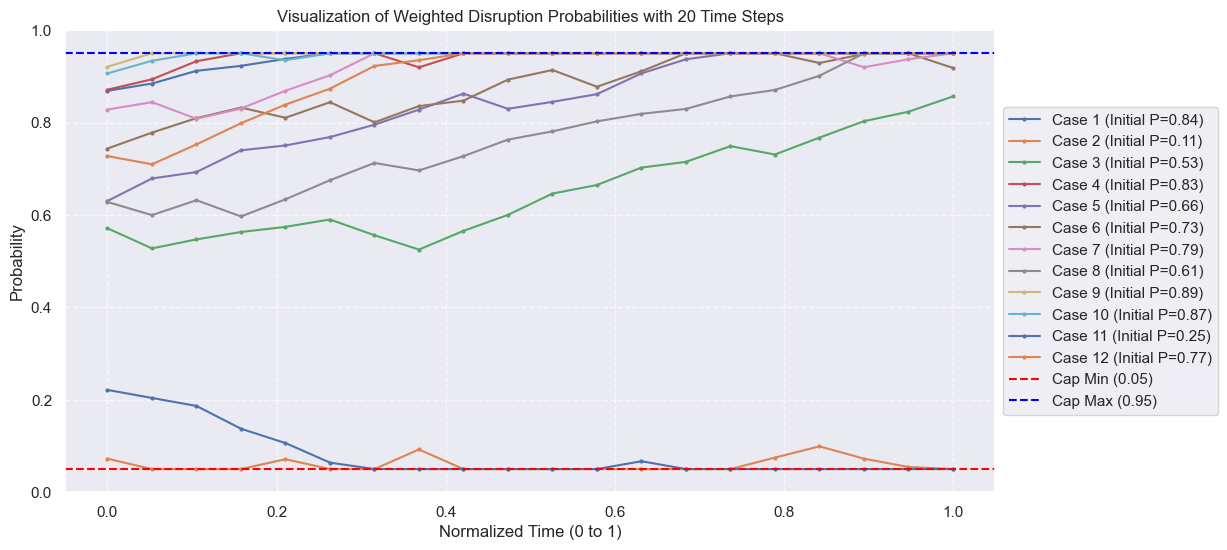

In [12]:
## OLD

import matplotlib.pyplot as plt
import numpy as np

# Parameters for simulation
time_steps_medium = 20  # Set to 20 time steps
time_medium = np.linspace(0, 1, time_steps_medium)  # Normalized time
num_cases = 12  # Number of cases to simulate
cap_min, cap_max = 0.05, 0.95  # Define caps for probabilities

# Initialize random probabilities for initial cases
np.random.seed(None)  # Use a new seed each run
initial_probs = np.random.uniform(0.1, 0.9, num_cases)

# Simulate probabilities over time
capped_probs_medium = []
for initial_prob in initial_probs:
    probs = []
    current_prob = initial_prob
    for t in time_medium:
        if current_prob == 0.00 or current_prob == 1.00:
            probs.append(current_prob)  # Lock the value if resolved
            continue

        # Calculate the likelihood of moving up or down
        up_prob = current_prob  # Higher values have higher likelihood of moving up
        down_prob = 1 - current_prob  # Lower values have higher likelihood of moving down
        direction = np.random.choice([-1, 1], p=[down_prob, up_prob])  # Choose direction based on weights

        # Apply a random variation in the chosen direction
        random_variation = np.random.uniform(0.01, 0.05)  # Small random step size
        progression = direction * random_variation
        current_prob = current_prob + progression

        # Cap probabilities at [cap_min, cap_max]
        current_prob = max(cap_min, min(cap_max, current_prob))
        probs.append(current_prob)
    capped_probs_medium.append(probs)

# Plot the updated results with 20 time steps
plt.figure(figsize=(12, 6))
for i, probs in enumerate(capped_probs_medium):
    plt.plot(time_medium, probs, marker="o", markersize=2, label=f"Case {i+1} (Initial P={initial_probs[i]:.2f})")  # Reduced marker size

plt.axhline(y=cap_min, color="red", linestyle="--", label="Cap Min (0.05)")
plt.axhline(y=cap_max, color="blue", linestyle="--", label="Cap Max (0.95)")
plt.title("Visualization of Weighted Disruption Probabilities with 20 Time Steps")
plt.xlabel("Normalized Time (0 to 1)")
plt.ylabel("Probability")
plt.ylim(0, 1)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Move legend outside the plot on the right side
plt.show()
